In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [3]:
df = pd.read_csv('/Users/pengruizeng/Desktop/Demo/Walmart/walmart-sales-dataset-of-45stores.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
from sqlite3 import connect
conn = connect(':memory:')

### **Data Cleaning**

In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
# Adjust date format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y') 
df['year'] = df['Date'].dt.year

# Insert dataframe into database for SQL
df.to_sql('df',conn, index=False, if_exists='replace') 


6435

In [7]:
query_date_fix = """SELECT Store, date(Date) AS Date, Weekly_Sales, Holiday_Flag, Temperature, CPI, Unemployment, year
FROM df"""
df_fix = pd.read_sql(query_date_fix, conn)
df_fix.to_sql('df',conn, index=False, if_exists='replace')

6435

### **Transform Necessary Data For Deep Analysis**

In [8]:
query_avg = """SELECT 
                Store, 
                sum(Weekly_Sales) as Total_Sales,
                AVG(weekly_Sales) as Avg_Weekly_Sales,
                SUM(CASE WHEN Holiday_Flag = 0 then Weekly_Sales ELSE 0 END) / COUNT(CASE WHEN Holiday_Flag = 0 then 1 ELSE NULL END) as AVG_non_Holiday_Sales,
                SUM(CASE WHEN Holiday_Flag = 1 then Weekly_Sales ELSE 0 END) / COUNT(CASE WHEN Holiday_Flag = 1 then 1 ELSE NULL END) as AVG_Holiday_Sales,
                (((SUM(CASE WHEN Holiday_Flag = 1 then Weekly_Sales ELSE 0 END) / COUNT(CASE WHEN Holiday_Flag = 1 then 1 ELSE NULL END)) - (SUM(CASE WHEN Holiday_Flag = 0 then Weekly_Sales ELSE 0 END) / COUNT(CASE WHEN Holiday_Flag = 0 then 1 ELSE NULL END))) / (SUM(CASE WHEN Holiday_Flag = 0 then Weekly_Sales ELSE 0 END) / COUNT(CASE WHEN Holiday_Flag = 0 then 1 ELSE NULL END))) * 100 as Percentage_Holiday_Sales_Lift
                from df
                group by store"""

# set the value to be fixed 2 decimal place
pd.set_option('display.float_format', '{:.2f}'.format) 


df_avg = pd.read_sql(query_avg, conn)
df_avg.to_sql('df_avg',conn, index=False, if_exists='replace')
df_avg

,Store,Total_Sales,Avg_Weekly_Sales,AVG_non_Holiday_Sales,AVG_Holiday_Sales,Percentage_Holiday_Sales_Lift
0,1,222402808.85,1555264.40,1546957.39,1665747.66,7.68
1,2,275382440.98,1925751.34,1914208.81,2079266.90,8.62
2,3,57586735.07,402704.44,400064.85,437811.05,9.44
3,4,299543953.38,2094712.96,2083555.84,2243102.62,7.66
4,5,45475688.90,318011.81,314892.28,359501.61,14.17
5,6,223756130.64,1564728.19,1555992.87,1680907.93,8.03
6,7,81598275.14,570617.31,562964.45,672400.27,19.44
7,8,129951181.13,908749.52,903743.40,975330.86,7.92
8,9,77789218.99,543980.55,540599.33,588950.82,8.94
9,10,271617713.89,1899424.57,1883309.43,2113755.95,12.24


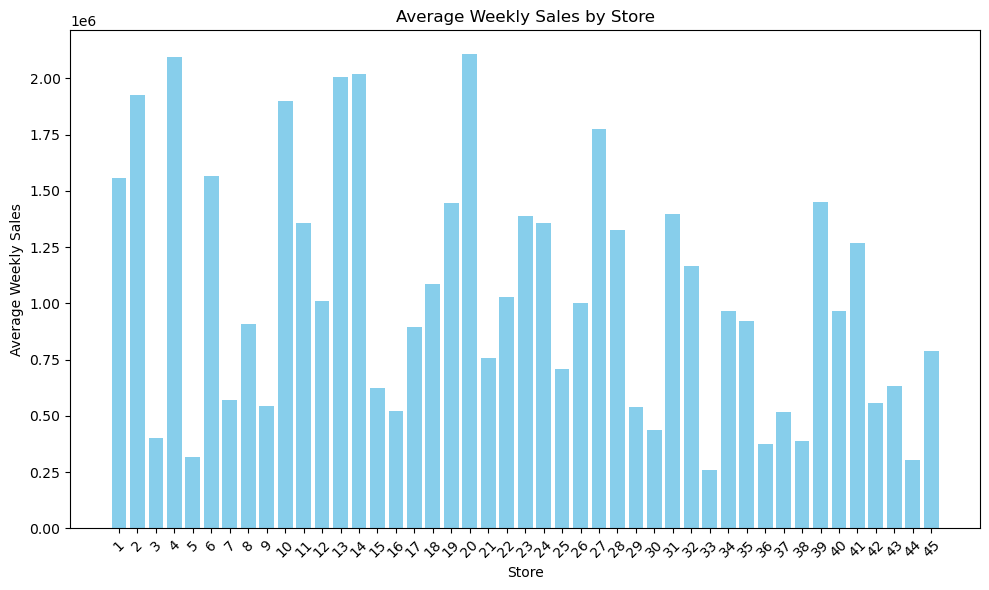

In [9]:
plt.figure(figsize=(10, 6)) 
plt.bar(df_avg['Store'].astype(str), df_avg['Avg_Weekly_Sales'], color='skyblue') # Use Store as x-axis, Avg_Weekly_Sales as height
plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

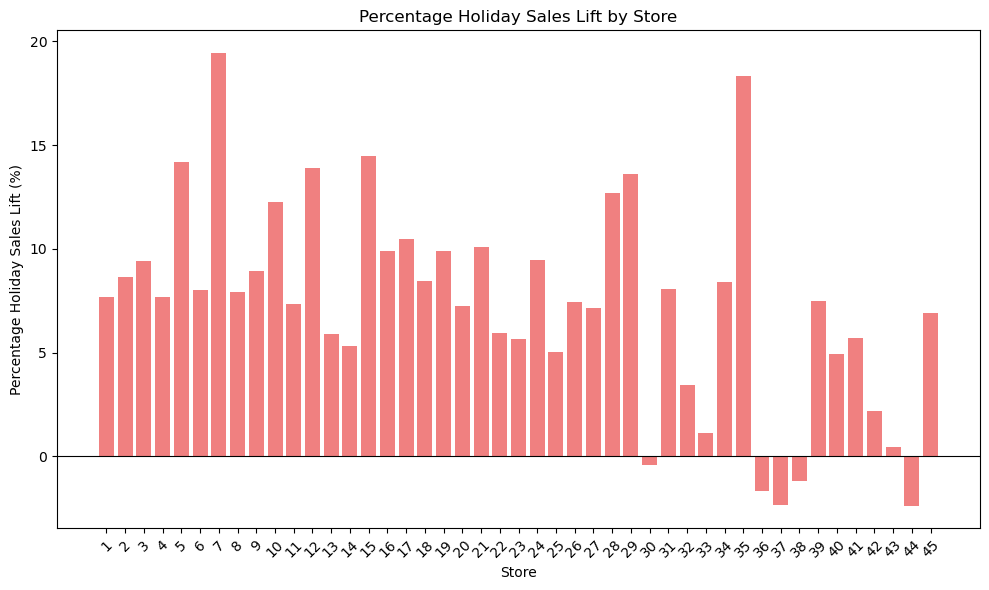

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(df_avg['Store'].astype(str), df_avg['Percentage_Holiday_Sales_Lift'], color='lightcoral') 
plt.title('Percentage Holiday Sales Lift by Store')
plt.xlabel('Store')
plt.ylabel('Percentage Holiday Sales Lift (%)')
plt.xticks(rotation=45) 
plt.axhline(0, color='black', linewidth=0.8) 
plt.tight_layout() 
plt.show()

### **Group The Data Using Percentile**

In [11]:
query_performance = """ with Template as (
                        Select
                        Store,
                        total_sales,
                        avg_weekly_sales,
                        AVG_non_Holiday_sales,
                        AVG_Holiday_sales,
                        Percentage_Holiday_Sales_Lift,
                        Percent_rank() over (order by Percentage_Holiday_Sales_Lift) as percentile_rank
                        from df_avg
                        )
                        select 
                        Store,
                        Percentage_Holiday_Sales_Lift,
                        Case
                        WHEN percentile_rank <= 0.25 THEN 'Low Performer'
                        WHEN percentile_rank <= 0.75 THEN 'Mid Performer'
                        else 'High Performer'
                        end as Percentile_Performance
                        from template
                        order by store
                        """
df_performance = pd.read_sql(query_performance, conn)
df_performance

,Store,Percentage_Holiday_Sales_Lift,Percentile_Performance
0,1,7.68,Mid Performer
1,2,8.62,Mid Performer
2,3,9.44,Mid Performer
3,4,7.66,Mid Performer
4,5,14.17,High Performer
5,6,8.03,Mid Performer
6,7,19.44,High Performer
7,8,7.92,Mid Performer
8,9,8.94,Mid Performer
9,10,12.24,High Performer


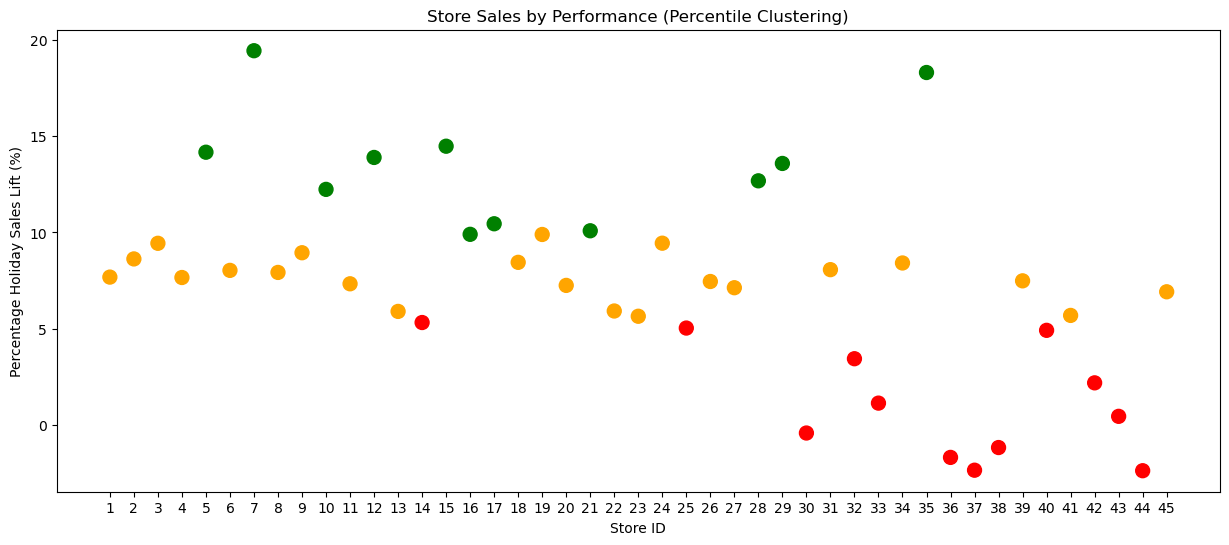

In [12]:
performance_colors = {'Low Performer': 'red', 'Mid Performer': 'orange', 'High Performer': 'green'}

# Convert categorical store_id to numerical x positions
x = range(len(df_performance))

plt.figure(figsize=(15, 6))
plt.scatter(x, df_performance['Percentage_Holiday_Sales_Lift'], 
            c=df_performance['Percentile_Performance'].map(performance_colors), 
            s=100)  # s sets the marker size

# Replace numerical x ticks with actual store IDs
plt.xticks(x, df_performance['Store'])

plt.xlabel('Store ID')
plt.ylabel('Percentage Holiday Sales Lift (%)')
plt.title('Store Sales by Performance (Percentile Clustering)')
plt.show()

### **Group The Data Using K-means Clustering**

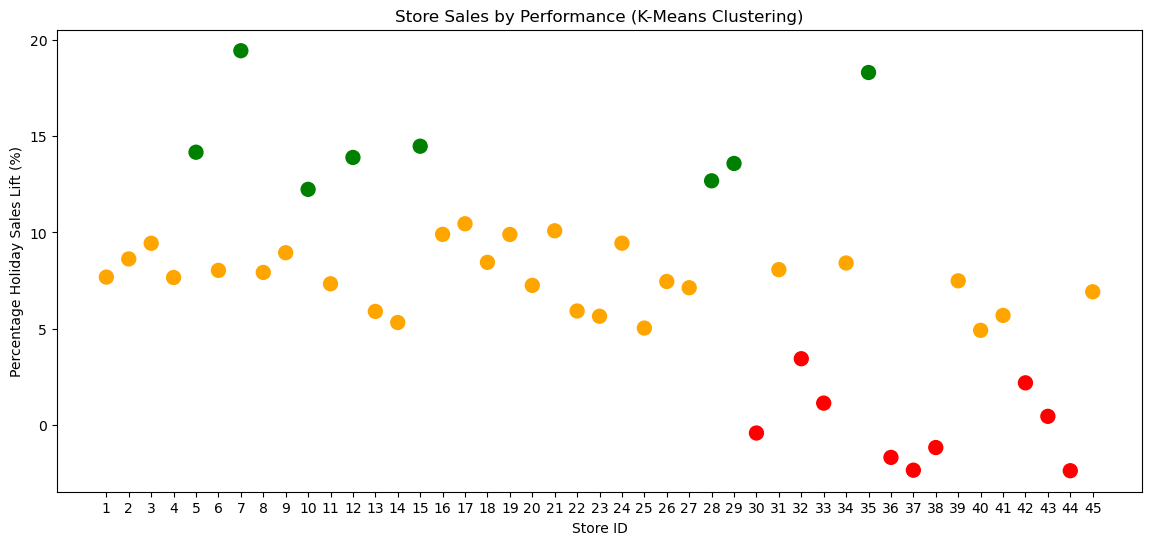

In [13]:
from sklearn.cluster import KMeans


# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
df_performance['Cluster'] = kmeans.fit_predict(df_performance[['Percentage_Holiday_Sales_Lift']])

# Map clusters to performance labels based on cluster center values
cluster_centers = kmeans.cluster_centers_.flatten()
sorted_indices = np.argsort(cluster_centers)
labels = {sorted_indices[0]: 'low', sorted_indices[1]: 'mid', sorted_indices[2]: 'high'}
df_performance['K_Means_Performance'] = df_performance['Cluster'].map(labels)

# Define colors for performance groups
colors = {'low': 'red', 'mid': 'orange', 'high': 'green'}

# Create scatter plot
plt.figure(figsize=(14, 6))
x = range(len(df_performance))
plt.scatter(x, df_performance['Percentage_Holiday_Sales_Lift'], 
            c=df_performance['K_Means_Performance'].map(colors), s=100)

# Add labels and title
plt.xticks(x, df_performance['Store'])
plt.xlabel('Store ID')
plt.ylabel('Percentage Holiday Sales Lift (%)')
plt.title('Store Sales by Performance (K-Means Clustering)')
plt.show()

In [ ]:
df_performance.to_sql('df_performance',conn, index=False, if_exists='replace')
df_performance.head(10)

,Store,Percentage_Holiday_Sales_Lift,Percentile_Performance,Cluster,K_Means_Performance
0,1,7.68,Mid Performer,0,mid
1,2,8.62,Mid Performer,0,mid
2,3,9.44,Mid Performer,0,mid
3,4,7.66,Mid Performer,0,mid
4,5,14.17,High Performer,1,high
5,6,8.03,Mid Performer,0,mid
6,7,19.44,High Performer,1,high
7,8,7.92,Mid Performer,0,mid
8,9,8.94,Mid Performer,0,mid
9,10,12.24,High Performer,1,high


### **Weekly Sales vs. Percentage Holiday Performance**

In [15]:
query_all_performance="""select
                        a.Store,
                        a.Avg_Weekly_Sales,
                        a.Percentage_Holiday_Sales_Lift,
                        p.K_Means_Performance
                        from df_avg a join 
                        df_performance p on a.store = p.store"""

query_lower_performance=""" select
                            a.Store,
                            a.Avg_Weekly_Sales,
                            a.Percentage_Holiday_Sales_Lift,
                            p.K_Means_Performance
                            from df_avg a join 
                            df_performance p on a.store = p.store
                            where p.K_means_performance = 'low'
                            """

df_join_all = pd.read_sql(query_all_performance, conn)
df_join = pd.read_sql(query_lower_performance, conn)
df_join_all

,Store,Avg_Weekly_Sales,Percentage_Holiday_Sales_Lift,K_Means_Performance
0,1,1555264.40,7.68,mid
1,2,1925751.34,8.62,mid
2,3,402704.44,9.44,mid
3,4,2094712.96,7.66,mid
4,5,318011.81,14.17,high
5,6,1564728.19,8.03,mid
6,7,570617.31,19.44,high
7,8,908749.52,7.92,mid
8,9,543980.55,8.94,mid
9,10,1899424.57,12.24,high


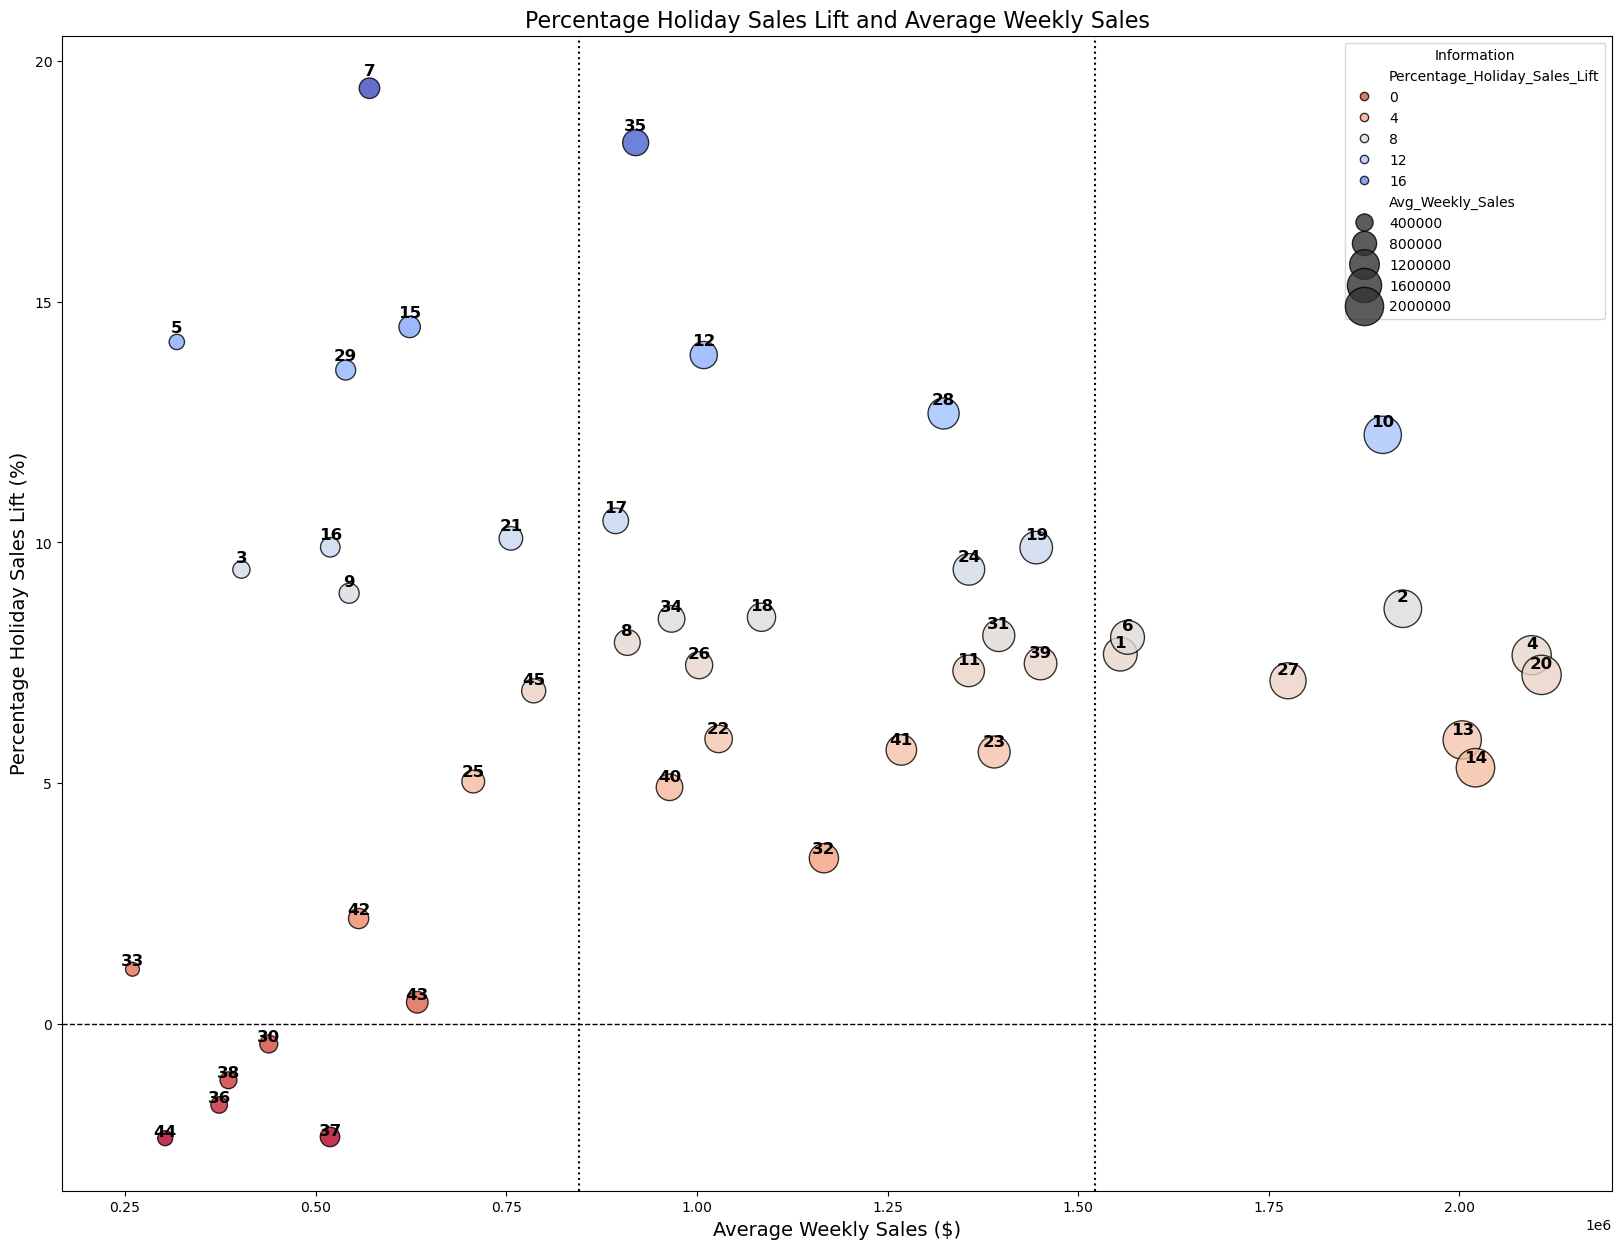

In [16]:
plt.figure(figsize=(20, 15))
data1 = df_join_all
# Scatter plot with smooth color gradient
scatter = sns.scatterplot(
    data=data1, x="Avg_Weekly_Sales", y="Percentage_Holiday_Sales_Lift", 
    size="Avg_Weekly_Sales", hue="Percentage_Holiday_Sales_Lift",
    palette="coolwarm_r", edgecolor="black", sizes=(100, 800), alpha=0.8
)

# Add store numbers above the bubbles
for i in range(len(data1)):
    offset = data1["Percentage_Holiday_Sales_Lift"][i] * 0.01    # Adjust label distance based on sales size
    plt.text(data1["Avg_Weekly_Sales"][i], data1["Percentage_Holiday_Sales_Lift"][i] + offset,  
             data1["Store"][i], fontsize=12, ha="center", va="bottom", 
             fontweight="bold", color="black")

# Formatting
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Baseline at 0
plt.xlabel("Average Weekly Sales ($)", fontsize=14)
plt.ylabel("Percentage Holiday Sales Lift (%)", fontsize=14)
plt.title("Percentage Holiday Sales Lift and Average Weekly Sales", fontsize=16)

# The dotted vertical lines partition the range of average weekly sales into three equal segments
# Get current x-axis limits
x_min, x_max = plt.xlim()

# Calculate positions to split the x-axis into 3 equal parts
line1 = x_min + (x_max - x_min) / 3
line2 = x_min + 2 * (x_max - x_min) / 3

# Add dotted vertical lines at these positions
plt.axvline(x=line1, color='black', linestyle=':', linewidth=1.5)
plt.axvline(x=line2, color='black', linestyle=':', linewidth=1.5)


# Improve legend - customize it to explain size & color meaning
plt.legend(title="Information", loc="best")
plt.show()

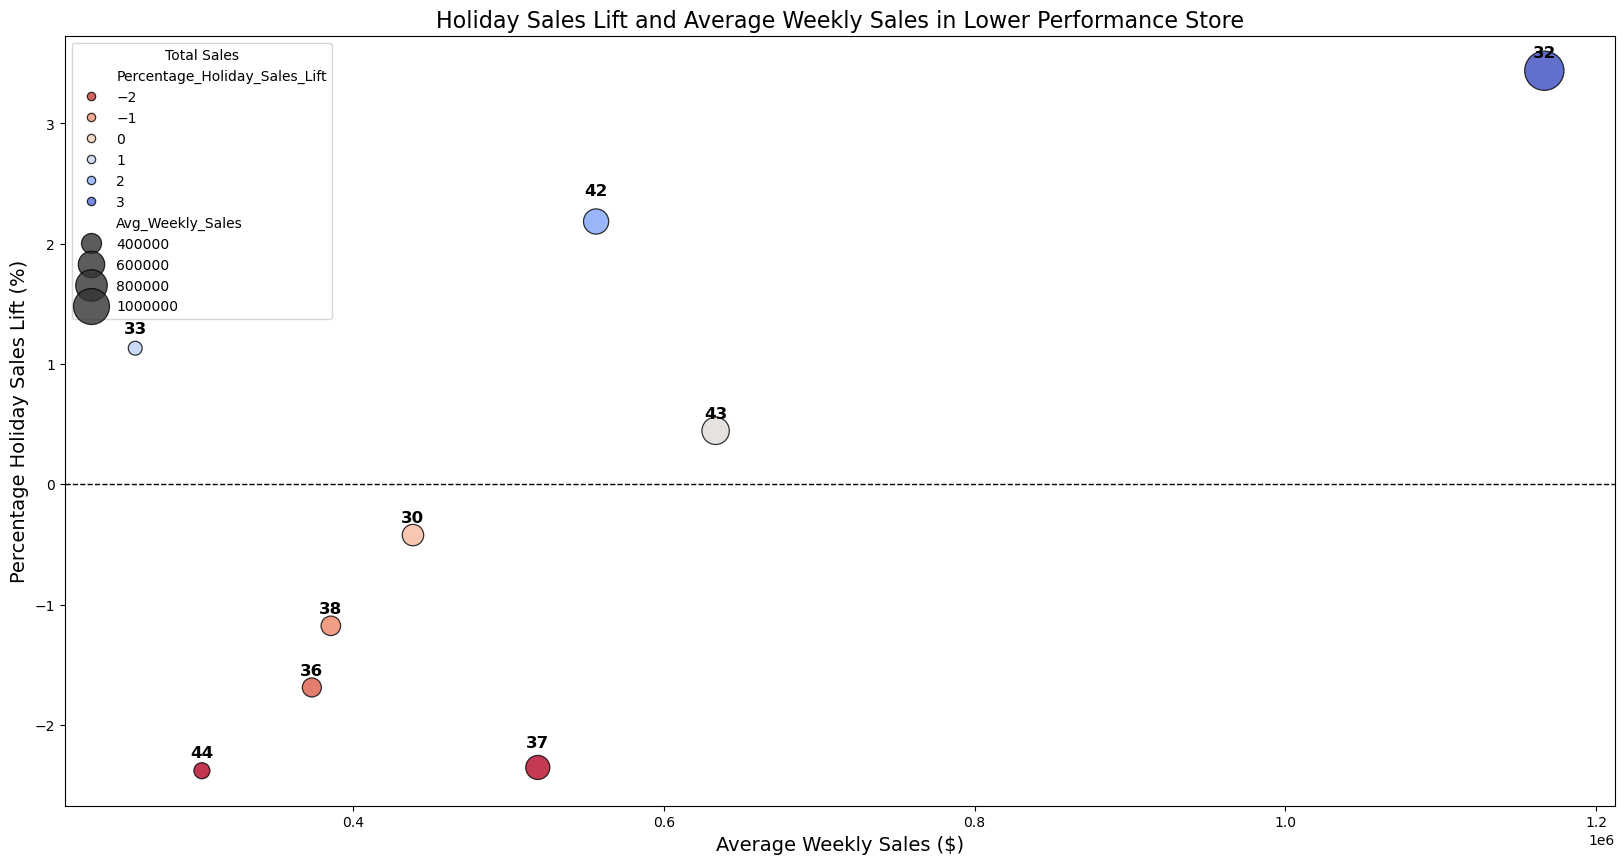

In [17]:
plt.figure(figsize=(20, 10))
data = df_join
# Scatter plot with smooth color gradient
scatter = sns.scatterplot(
    data=data, x="Avg_Weekly_Sales", y="Percentage_Holiday_Sales_Lift", 
    size="Avg_Weekly_Sales", hue="Percentage_Holiday_Sales_Lift",
    palette="coolwarm_r", edgecolor="black", sizes=(100, 800), alpha=0.8
)

# Add store numbers above the bubbles
for i in range(len(data)):
    offset = data1["Percentage_Holiday_Sales_Lift"][i] * 0.01   # Adjust label distance based on sales size
    plt.text(data["Avg_Weekly_Sales"][i], data["Percentage_Holiday_Sales_Lift"][i] + offset,  
             data["Store"][i], fontsize=12, ha="center", va="bottom", 
             fontweight="bold", color="black")

# Formatting
plt.axhline(0, color="black", linestyle="--", linewidth=1)  # Baseline at 0
plt.xlabel("Average Weekly Sales ($)", fontsize=14)
plt.ylabel("Percentage Holiday Sales Lift (%)", fontsize=14)
plt.title("Holiday Sales Lift and Average Weekly Sales in Lower Performance Store", fontsize=16)

# Improve legend - customize it to explain size & color meaning
plt.legend(title="Total Sales", loc="best")
plt.show()